In [8]:
import duckdb
import pandas as pd
import geopandas as gpd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
from obsq.utils.core import convert_df_to_gdf
path = "/home/etienne/projects/obsq/work/dev/data/data.duckdb"
target = 'expert_match'

In [9]:
table = 'combined'
schema = 'features'
con = duckdb.connect(path)
df = con.execute(f"""SELECT* FROM {schema}.{table}""" ).df()
#df = df.drop(columns= 'geom')
con.close()

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39886 entries, 0 to 39885
Data columns (total 47 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   gbifID                           39886 non-null  int64  
 1   expert_match                     39886 non-null  int32  
 2   observations_count               39886 non-null  int64  
 3   total_pct                        39886 non-null  float64
 4   expert_ids                       39886 non-null  int64  
 5   expert_ids_pct                   39886 non-null  float64
 6   expert_match_count               39886 non-null  int64  
 7   expert_match_pct                 39886 non-null  float64
 8   avg_id_time                      39886 non-null  float64
 9   class_count                      39886 non-null  int64  
 10  order_count                      39886 non-null  int64  
 11  family_count                     39886 non-null  int64  
 12  genus_count       

In [12]:
df.describe()

,gbifID,expert_match,observations_count,total_pct,expert_ids,expert_ids_pct,expert_match_count,expert_match_pct,avg_id_time,class_count,...,expert_id,day,month,year,media_count,coordinateUncertaintyInMeters,pheno_01,pheno_02,pheno_03,occurrenceRemarks
count,3.988600e+04,39886.000000,39886.000000,39886.000000,39886.000000,39886.000000,39886.000000,39886.000000,39886.000000,39886.000000,...,39886.000000,39886.000000,39886.000000,39886.000000,39886.000000,39886.000000,39886.000000,39886.000000,39886.000000,39886.000000
mean,4.652105e+09,0.066164,542.323597,0.013642,15.086497,0.047402,0.719651,0.014135,24.780675,3.848067,...,0.047285,15.862659,6.251241,2023.492654,17.267462,101.577696,0.161686,0.102266,0.009101,4.563030
std,7.175009e+08,0.248571,949.698377,0.023890,23.442230,0.085946,0.449175,0.054079,48.788506,1.213101,...,0.212250,9.157061,1.250912,1.429426,12.731182,339.941868,0.368167,0.303002,0.094965,33.758053
min,3.079586e+09,0.000000,1.000000,0.000030,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,1.000000,4.000000,2021.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.102947e+09,0.000000,32.000000,0.000800,0.000000,0.000000,0.000000,0.000000,2.000000,3.000000,...,0.000000,7.000000,5.000000,2022.000000,10.000000,2.000000,0.000000,0.000000,0.000000,0.000000
50%,4.902079e+09,0.000000,143.000000,0.003600,3.000000,0.017000,1.000000,0.001900,11.000000,4.000000,...,0.000000,16.000000,6.000000,2024.000000,10.000000,6.000000,0.000000,0.000000,0.000000,0.000000
75%,5.187909e+09,0.000000,491.000000,0.012350,19.000000,0.056000,1.000000,0.007400,21.000000,5.000000,...,0.000000,24.000000,7.000000,2025.000000,20.000000,30.000000,0.000000,0.000000,0.000000,0.000000
max,5.897887e+09,1.000000,3389.000000,0.085250,88.000000,1.000000,1.000000,1.000000,1455.000000,5.000000,...,1.000000,31.000000,8.000000,2025.000000,240.000000,2998.000000,1.000000,1.000000,1.000000,2126.000000


In [13]:
df.var(numeric_only = True)

gbifID                             5.148076e+17
expert_match                       6.178750e-02
observations_count                 9.019270e+05
total_pct                          5.707086e-04
expert_ids                         5.495382e+02
expert_ids_pct                     7.386794e-03
expert_match_count                 2.017585e-01
expert_match_pct                   2.924544e-03
avg_id_time                        2.380318e+03
class_count                        1.471613e+00
order_count                        1.402870e+02
family_count                       9.607726e+02
genus_count                        6.525326e+03
species_count                      1.390043e+04
unique_year_count                  2.711983e+00
unique_dates                       4.233303e+03
max_yearly_observations            2.892485e+05
max_monthly_observations           3.772653e+04
avg_yearly_observations            5.472942e+04
avg_monthly_observations           5.995582e+03
high_cood_un_obs                   1.691

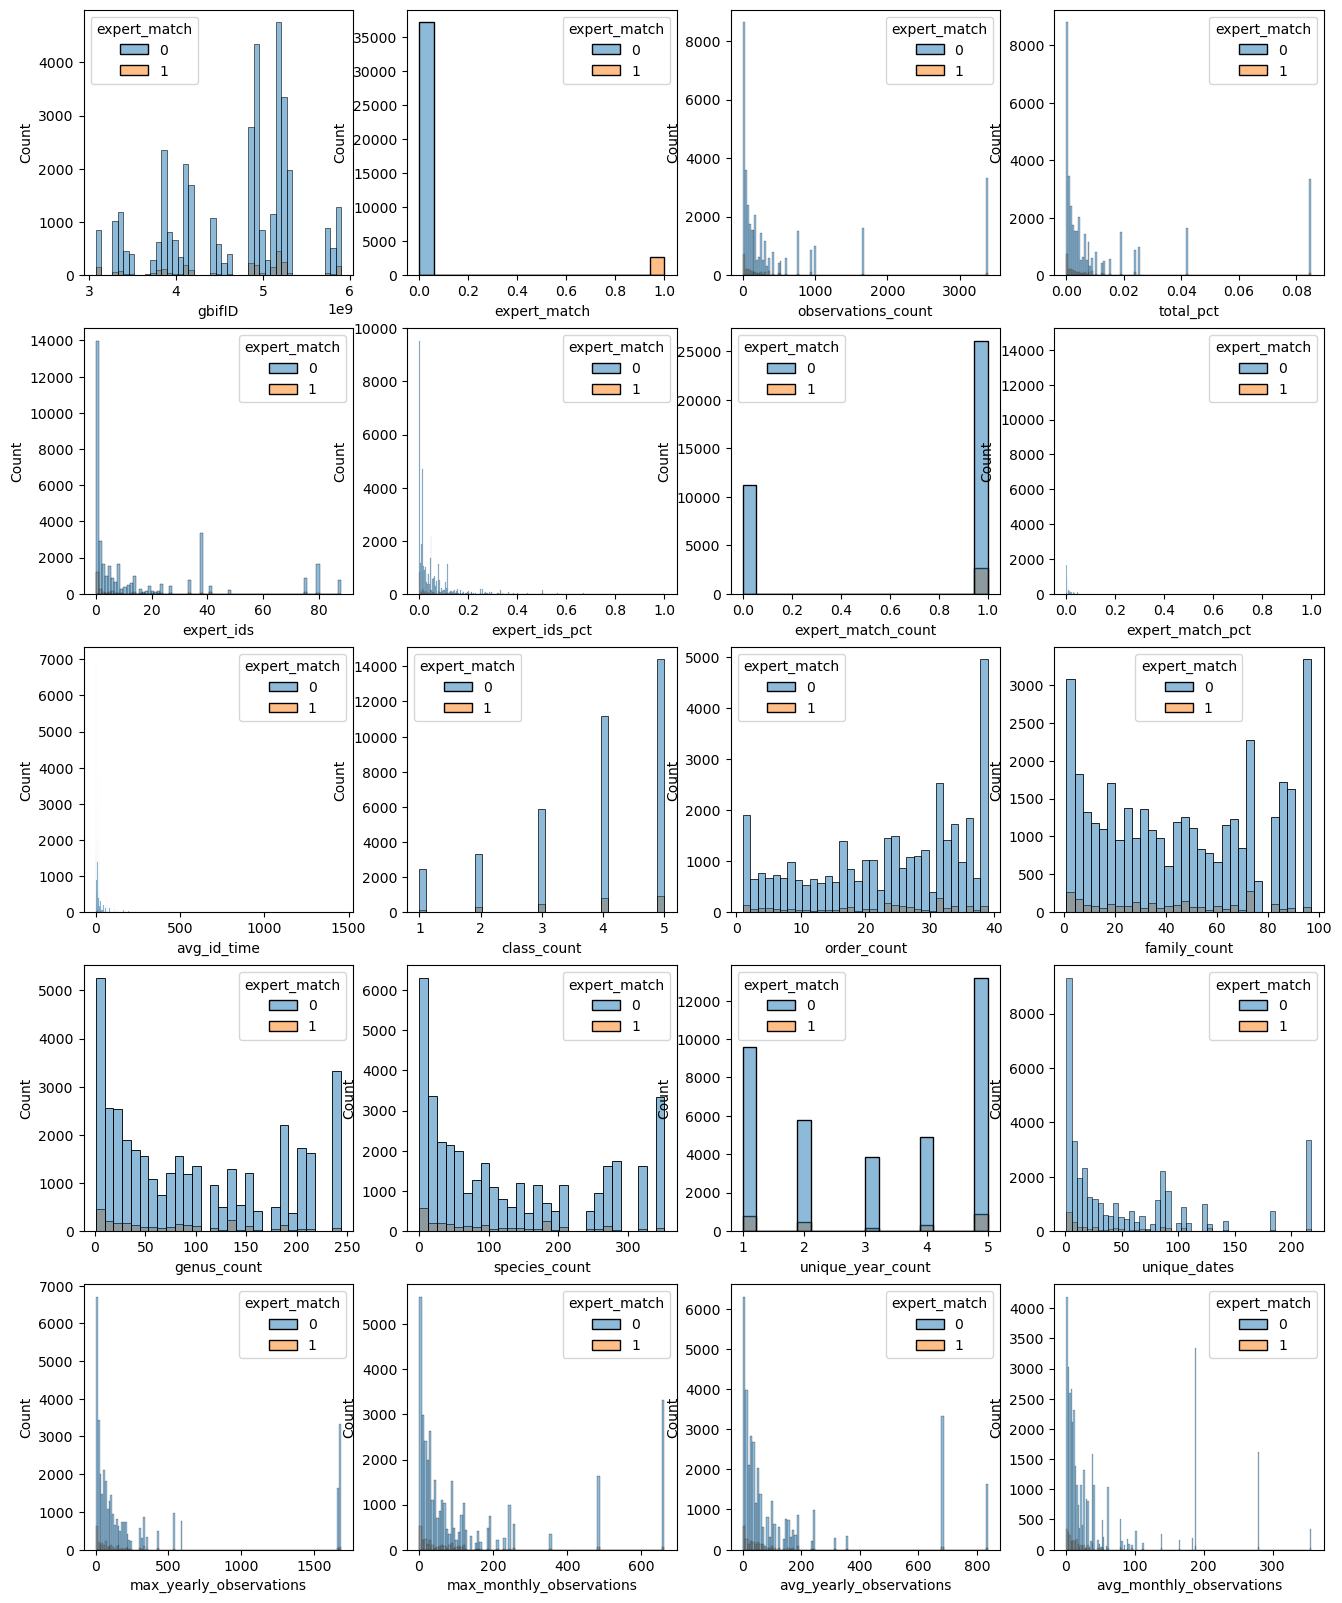

In [14]:


cols = 4
rows = 5
setup = {}
columns = df.select_dtypes(include='number').columns.tolist()

size = 4
f, axs = plt.subplots(rows,cols, figsize=(cols*size, rows*size), squeeze=False)
for i in range(0,rows):
    for j in range(0,cols):
        #print(i,j, (i*cols + j))
        index = i*cols + j
        if index > (cols*rows):
            break
        if columns[index] in ['latitude', 'longitude']:
            continue
        sns.histplot(df, hue = target, x = columns[index], ax=axs[i,j])


plt.show()


In [15]:
for c in columns:
    print(round(df[c].std() / df[c].mean(),3), " ", c)

0.154   gbifID
3.757   expert_match
1.751   observations_count
1.751   total_pct
1.554   expert_ids
1.813   expert_ids_pct
0.624   expert_match_count
3.826   expert_match_pct
1.969   avg_id_time
0.315   class_count
0.502   order_count
0.666   family_count
0.83   genus_count
0.91   species_count
0.521   unique_year_count
1.172   unique_dates
1.704   max_yearly_observations
1.45   max_monthly_observations
1.572   avg_yearly_observations
1.518   avg_monthly_observations
1.667   high_cood_un_obs
3.297   high_cood_un_pct
2.028   avg_coord_un
0.49   avg_media_count
5.311   sex_meta_pct
2.065   reproductiveCondition_meta_pct
3.069   annotations_meta_pct
1.893   avg_description_len
2.239   avg_species_obs_count
2.038   max_species_obs_count
2.554   taxon_observations_total_count
2.799   taxon_observation_month_count
1.523   taxon_observation_month_density
0.423   id_count
0.018   id_agree_rate
4.323   id_time
4.489   expert_id
0.577   day
0.2   month
0.001   year
0.737   media_count
3.347   co

In [ ]:
# Factorize area id 
codes, uniques = pd.factorize(df['source'])
df['area_id'] = codes
df = df.drop(columns=['source'])